### Importing Relevent Librairies

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [4]:
data=pd.read_csv('Boston.csv')

In [52]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
data.columns.values

array(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age',
       'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype=object)

In [9]:
data=data.drop(['Unnamed: 0'],axis=1)

In [10]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


CRIM per capita crime rate by town

ZN proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS proportion of non-retail business acres per town

CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX nitric oxides concentration (parts per 10 million)

RM average number of rooms per dwelling

AGE proportion of owner-occupied units built prior to 1940

DIS weighted distances to five Boston employment centres

RAD index of accessibility to radial highways

TAX full-value property-tax rate per 10,000usd

PTRATIO pupil-teacher ratio by town

B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT % lower status of the population

MEDV Median value of owner-occupied homes in $1000s

In [11]:
# identify the unique number of values in the dataset
data.nunique()

crim       504
zn          26
indus       76
chas         2
nox         81
rm         446
age        356
dis        412
rad          9
tax         66
ptratio     46
black      357
lstat      455
medv       229
dtype: int64

In [12]:
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [13]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Finding out the correlation between the features

In [14]:
corr=data.corr()

In [17]:
corr.shape

(14, 14)

Plotting the heatmap of correlation between features

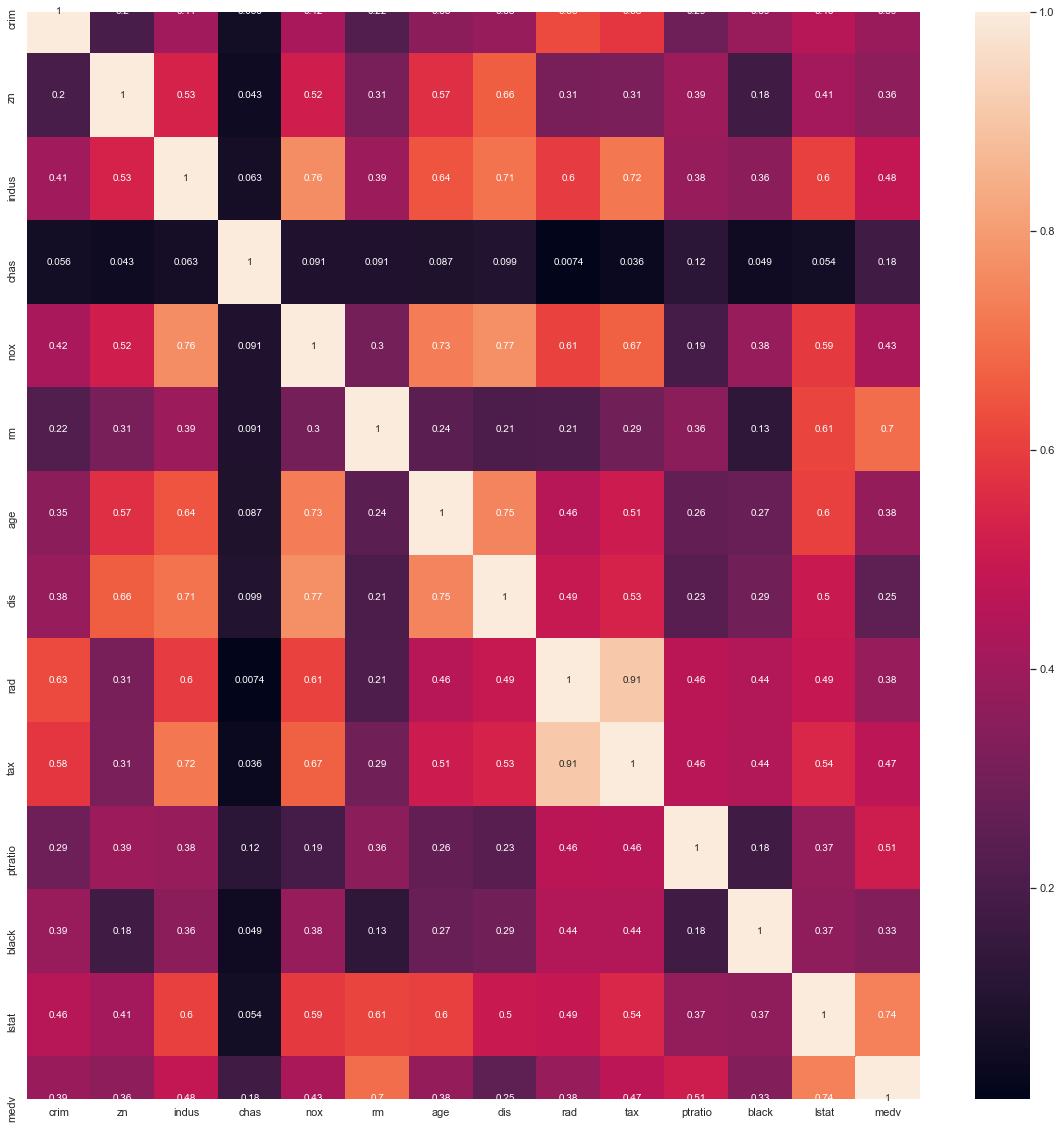

In [29]:
plt.figure(figsize=(20,20))
sns.heatmap(corr.abs(),annot=True)

From correlation matrix, we see TAX and RAD are highly correlated features. The columns LSTAT, INDUS, RM, TAX, NOX, PTRAIO has a correlation score above 0.5 with MEDV which is a good indication of using as predictors.

### Training and Testing Split

In [30]:
y=data['medv']
x=data.drop(['medv'],axis=1)

In [33]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=356)

## Regression Itself

In [34]:
reg=LinearRegression()

In [35]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
reg.coef_

array([-1.23069553e-01,  4.45220274e-02,  3.95888997e-02,  2.77250531e+00,
       -1.58528754e+01,  4.03303188e+00, -1.96792676e-03, -1.40601728e+00,
        3.20552235e-01, -1.33435293e-02, -9.77082221e-01,  1.14530079e-02,
       -5.05379444e-01])

In [37]:
reg.intercept_

33.576376005715716

In [38]:
reg_summary=pd.DataFrame(x_train.columns.values,columns=['Feature'])
reg_summary['Weights']=reg.coef_

In [39]:
reg_summary

,Feature,Weights
0,crim,-0.123070
1,zn,0.044522
2,indus,0.039589
3,chas,2.772505
4,nox,-15.852875
5,rm,4.033032
6,age,-0.001968
7,dis,-1.406017
8,rad,0.320552
9,tax,-0.013344


### Model Evalution

In [40]:
y_hat=reg.predict(x_train)

In [57]:
reg.score(x_train,y_train)

0.7495829307456927

In [42]:
def adjustedR_square(independent,dependent):
    r2score=reg.score(independent,dependent)
    n=independent.shape[0]
    p=independent.shape[1]
    
    adjusted_R=1-(1-r2score)*(n-1)/(n-p-1)
    return adjusted_R

In [43]:
adjustedR_square(x_train,y_train)

0.7412356951038824

$𝑅^2$ : It is a measure of the linear relationship between X and Y. It is interpreted as the proportion of the variance in the dependent variable that is predictable from the independent variable.

$𝑅^2_{Adj}$ :The adjusted R-squared compares the explanatory power of regression models that contain different numbers of predictors.

MAE : It is the mean of the absolute value of the errors. It measures the difference between two continuous variables, here actual and predicted values of y. 

MSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. 

RMSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. 

Vizualizing the difference between actual prices and predicted prices

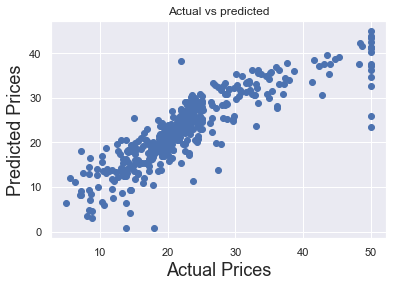

In [45]:
plt.scatter(y_train,y_hat)
plt.xlabel('Actual Prices',fontsize=18)
plt.ylabel('Predicted Prices',fontsize=18)

plt.title('Actual vs predicted')

plt.show()

### Normality

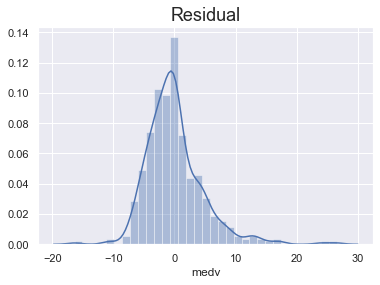

In [48]:
sns.distplot(y_train-y_hat)
plt.title('Residual',size=18)
plt.show()

Here the residuals are normally distributed. So normality assumption is satisfied

### Residuals

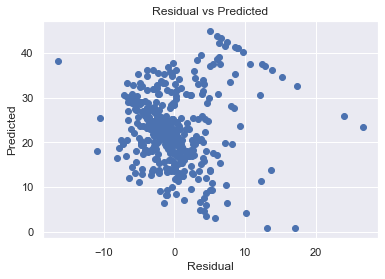

In [54]:
plt.scatter(y_train-y_hat,y_hat)
plt.xlabel('Residual')
plt.ylabel('Predicted')

plt.title('Residual vs Predicted')

plt.show()

There is no pattern visible in this plot and values are distributed equally around zero. So Linearity assumption is satisfied

### Testing The data

In [53]:
y_hat_test=reg.predict(x_test)

#### R-square

In [62]:
acc_linearRegression=metrics.r2_score(y_test,y_hat_test)
acc_linearRegression

0.6801005549919379

#### Adjusted R-square

In [67]:
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_hat_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))

Adjusted R^2: 0.6328426824339287




## Random Forest Regressor

#### Train Model

In [68]:
from sklearn.ensemble import RandomForestRegressor

In [69]:
rand_reg=RandomForestRegressor()

In [71]:
rand_reg.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

#### Model Evalution

In [73]:
y_pred_rand_reg=rand_reg.predict(x_train)

In [76]:
print('R^2:',metrics.r2_score(y_train, y_pred_rand_reg))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred_rand_reg))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1))

R^2: 0.9687421413357682
Adjusted R^2: 0.9677002127136272


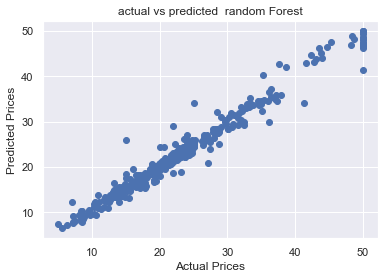

In [80]:
plt.scatter(y_train,y_pred_rand_reg)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('actual vs predicted  random Forest')
plt.show()

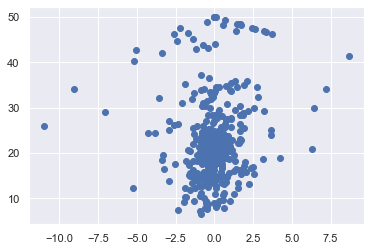

In [83]:
plt.scatter(y_train-y_pred_rand_reg,y_pred_rand_reg)

### For Test Data

In [84]:
y_test_pred=rand_reg.predict(x_test)

In [88]:
acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))

R^2: 0.8721382575493184
Adjusted R^2: 0.8532495910509222





## SVM Regressor

#### Train the model

In [89]:
from sklearn.preprocessing import StandardScaler

In [90]:
scaler=StandardScaler()

In [91]:
x_train=scaler.fit_transform(x_train)

In [92]:
x_test=scaler.transform(x_test)

In [93]:
from sklearn import svm

In [94]:
reg_svm=svm.SVR()

In [95]:
reg_svm.fit(x_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

C : float, optional (default=1.0): The penalty parameter of the error term. It controls the trade off between smooth decision boundary and classifying the training points correctly.

kernel : string, optional (default='rbf’): kernel parameters selects the type of hyperplane used to separate the data. It must be one of 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed’ or a callable.

degree : int, optional (default=3): Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.

gamma : float, optional (default='auto’): It is for non linear hyperplanes. The higher the gamma value it tries to exactly fit the training data set. Current default is 'auto' which uses 1 / n_features.

coef0 : float, optional (default=0.0): Independent term in kernel function. It is only significant in 'poly' and 'sigmoid'.

shrinking : boolean, optional (default=True): Whether to use the shrinking heuristic.

### Model Evalution

In [96]:
y_pred_svm=reg_svm.predict(x_train)

In [99]:
print('R^2:',metrics.r2_score(y_train, y_pred_svm))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred_svm))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1))

R^2: 0.6893570446298807
Adjusted R^2: 0.6790022794508768


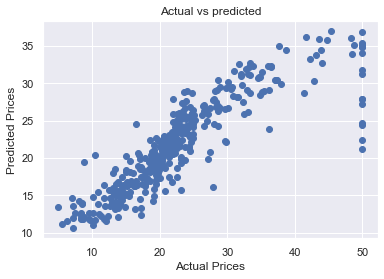

In [101]:
plt.scatter(y_train,y_pred_svm)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs predicted')

plt.show()

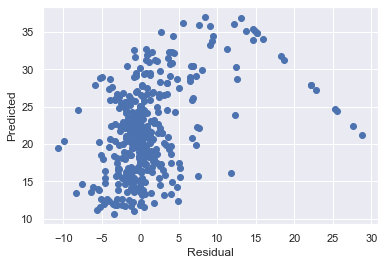

In [104]:
plt.scatter(y_train-y_pred_svm,y_pred_svm)
plt.xlabel('Residual')
plt.ylabel('Predicted')

plt.show()

### Test the data

In [105]:
y_test_pred_svm=reg_svm.predict(x_test)

In [106]:
acc_svm = metrics.r2_score(y_test, y_test_pred_svm)
print('R^2:', acc_svm)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred_svm))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))

R^2: 0.6196157070919296
Adjusted R^2: 0.5634225729123283


In [107]:
models=pd.DataFrame({'model':['Linear Regression','Random Forest','Support Vector Machines'],
                    'R-squared Score':[acc_linearRegression*100,acc_rf*100,acc_svm*100]})

In [108]:
models

,model,R-squared Score
0,Linear Regression,68.010055
1,Random Forest,87.213826
2,Support Vector Machines,61.961571


In [109]:
models.sort_values(by='R-squared Score',ascending=False)

,model,R-squared Score
1,Random Forest,87.213826
0,Linear Regression,68.010055
2,Support Vector Machines,61.961571


## Hence Random Forest works better for this dataset